In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets

In [7]:
f_minist = datasets.fashion_mnist

In [8]:
(x_train, y_train), (x_test, y_test) = f_minist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
np.min(x_train), np.max(x_train)

(0, 255)

In [12]:
np.min(x_test), np.max(x_test)

(0, 255)

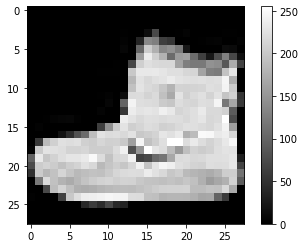

In [14]:
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.show()

In [16]:
print(x_train[..., tf.newaxis].shape)
print(x_test[..., tf.newaxis].shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [17]:
x_train = x_train /255.
x_test = x_test /255.

In [18]:
print(f'{x_train.min(), x_train.max(), x_train.shape, x_train[x_train != 0][:5], x_train.dtype}')

(0.0, 1.0, (60000, 28, 28), array([0.00392157, 0.05098039, 0.28627451, 0.00392157, 0.01568627]), dtype('float64'))


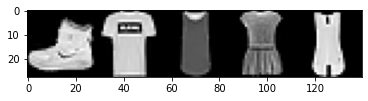

In [19]:
#5개의 연속된 이미지 확인해보기 
plt.imshow(np.hstack(x_train[:5]), cmap='gray')
plt.show()

In [25]:
#이미지 주변을 확장하는 
def expand_4times(img):
    bg = np.zeros(img.shape)
    idx = np.random.randint(0,4)
    slots=[bg, bg, bg, bg]
    slots[idx] = img
    
    expanded = np.vstack([np.hstack(slots[:2]), np.hstack(slots[2:])])
    
    return expanded



In [26]:
train_expand_images = np.array([expand_4times(img) for img in x_train])
test_expand_images = np.array([expand_4times(img) for img in x_test])